In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

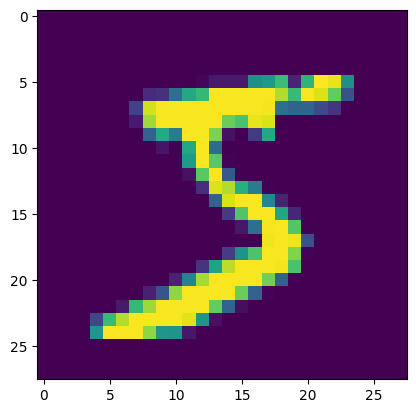

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

Scale down the numbers

In [8]:
X_train = X_train/255
X_test = X_test/255

In [10]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [12]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2878 - accuracy: 0.9174 - val_loss: 0.1610 - val_accuracy: 0.9555
Epoch 2/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1296 - accuracy: 0.9622 - val_loss: 0.1118 - val_accuracy: 0.9680
Epoch 3/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0886 - accuracy: 0.9742 - val_loss: 0.0956 - val_accuracy: 0.9702
Epoch 4/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0666 - accuracy: 0.9801 - val_loss: 0.1057 - val_accuracy: 0.9683
Epoch 5/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0523 - accuracy: 0.9834 - val_loss: 0.0934 - val_accuracy: 0.9720
Epoch 6/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0404 - accuracy: 0.9878 - val_loss: 0.0845 - val_accuracy: 0.9738
Epoch 7/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0320 - accuracy: 0.9901 - val_loss: 0.0918 - val_accuracy:

In [13]:
y_prob = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [14]:
y_prob

array([[1.44761623e-16, 1.65854821e-16, 2.27395956e-13, ...,
        9.99999940e-01, 9.06491001e-14, 4.26863440e-11],
       [4.47035907e-19, 4.42580407e-14, 9.99999940e-01, ...,
        3.88121684e-28, 2.13008457e-13, 1.74165745e-28],
       [1.11774277e-10, 9.99986351e-01, 2.30605849e-07, ...,
        1.70531359e-06, 1.17111040e-05, 3.65306807e-09],
       ...,
       [4.53067549e-24, 8.74733055e-19, 7.22928749e-25, ...,
        6.34038449e-14, 1.16572105e-14, 1.39648751e-10],
       [2.79034904e-19, 3.18390345e-22, 1.01302423e-21, ...,
        5.93219842e-16, 6.09666428e-10, 1.34216775e-20],
       [1.02730930e-15, 6.51813759e-21, 4.88889735e-16, ...,
        8.05310267e-19, 8.22790467e-17, 1.00423634e-21]], dtype=float32)

In [15]:
y_pred = y_prob.argmax(axis=1) #gives the index of number whose value is greatest

In [16]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9758

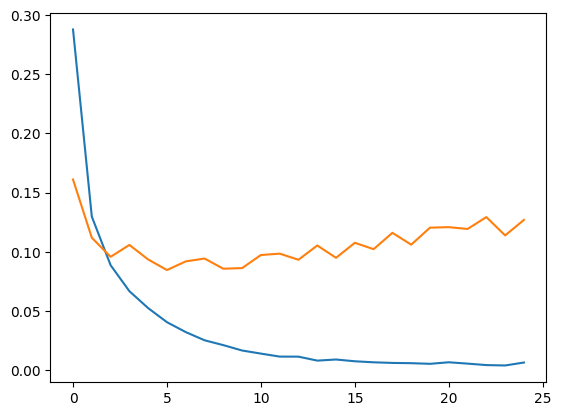

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

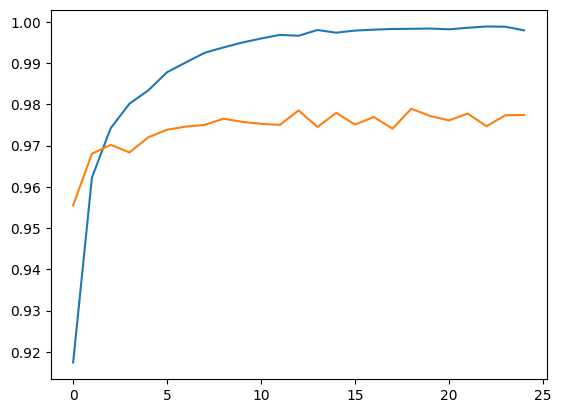

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

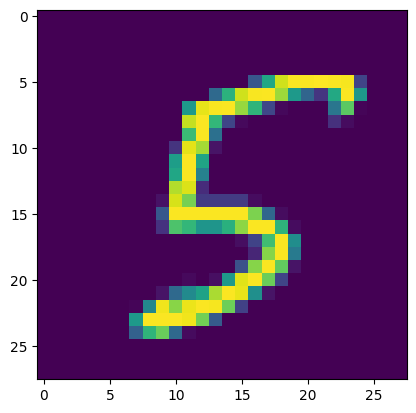

In [22]:
plt.imshow(X_test[23])

In [23]:
y_pred[23]

5